<table style='border: none' align='left'>
   <tr style='border: none'>
      <th style='border: none'><font face='verdana' size='5' color='black'><b>Use scikit-learn to predict hand-written digits</b></th>
      <th style='border: none'><img src='https://github.com/pmservice/customer-satisfaction-prediction/blob/master/app/static/images/ml_icon_gray.png?raw=true' alt='Watson Machine Learning icon' height='40' width='40'></th>
   </tr>
   <tr style='border: none'>
       <th style='border: none'><img src='https://github.com/pmservice/wml-sample-models/raw/master/scikit-learn/hand-written-digits-recognition/images/numbers_banner-04.png' width='600' alt='Icon'> </th>
   </tr>
</table>

This notebook demonstrates how to utilize the <a href="https://pypi.python.org/pypi/watson-machine-learning-client-V4" target="_blank" rel="noopener noreferrer">watson-machine-learning-client</a> package in order to save, deploy, and score a predictive model.

You will use the sample data set of hand-written digit images, `sklearn.datasets.load_digits`, which is available in scikit-learn to recognize hand-written digits. The notebook uses `scikit-learn 0.19` and `watson-machine-learning-client-V4`.


Some familiarity with Python is helpful. This notebook is compatible Watson Studio Local 2.0 and Python 3.5.


## Learning goals

In this notebook, you will learn how to:

-  Load a sample data set from ``scikit-learn``.
-  Explore data.
-  Split data for training and evaluation.
-  Create a scikit-learn machine learning pipeline.
-  Train and evaluate a model.
-  Store the model in the Watson Machine Learning (WML) repository.
-  Deploy the model for online scoring in the Watson Machine Learning (WML) repository.
-  Score test records.


## Table of Contents

1.	[Setting up](#setup)
2.	[Load and explore data](#load)
3.	[Create a scikit-learn model](#model)<br>
    3.1 [Split data](#prep)<br>
    3.2 [Create a scikit-learn machine learning pipeline](#pipe)<br>
    3.3 [Train a model](#train)<br>
4.	[Save, load, and delete a model in the WML repository](#persistence)<br>
    4.1 [Authenticate](#work)<br>
    4.2 [Save the model in the WML repository](#save)<br>
    4.3 [Load a model from the WML repository](#load_model)<br>
    4.4 [Delete a model from the WML repository](#delete)
5.	[Deploy and score data in the WML repository](#scoring)<br>
    5.1 [Create an online deployment for the published model](#create)<br>
    5.2 [Get deployments](#getdeploy)<br>
    5.3 [Score data](#score)<br>
    5.4 [Delete the deployment](#deldeploy)<br>
    5.5 [Delete the model](#delmodel)
6.	[Summary and next steps](#summary)

<a id='setup'></a>
## 1. Set up the environment

To get started on Watson Studio Local, find documentation on installion and set up <a href="https://www.ibm.com/support/knowledgecenter/SSHGWL_2.0.0/wsj/getting-started/get-started-wdp.html" target="_blank" rel="noopener no referrer">here</a>.

- Configure your local python environment:
  + Python 3.5
  + scikit-learn 0.19
  + watson-machine-learning-client-V4

<a id='load'></a>
## 2. Load and explore data

In this section, you load the data from scikit-learn sample data sets and perform basic exploratory data analysis (EDA).

<div class="alert alert-block alert-warning">
1. To avoid re-installation when re-running the notebook, try running your notebooks in custom environments. To find out more about setting up custom environments, see <a href="https://www.ibm.com/support/knowledgecenter/SSHGWL_2.0.0/wsj/analyze-data/customize-envs.html">here</a>.<br>
2. To simply hide the output of pip install instead, use <tt>-q</tt> after <tt>!pip install</tt>.
</div>

In [ ]:
!pip install --upgrade scikit-learn==0.19.1

In [2]:
# Load the data.
import sklearn
from sklearn import datasets

# Description of the Digits Data set.
digits = datasets.load_digits()
print(digits.DESCR)

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

The sample data set consists of 8x8 pixel images of hand-written digits.

In [3]:
digits.data.shape

(1797, 64)

Display the first digit data and label using **data** and **target**. The hand-written digit shown below is an 8x8 pixel image represented by an array.

In [4]:
print(digits.data[0].reshape((8, 8)))

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [5]:
digits.target[0]

0

In [ ]:
!pip install --upgrade matplotlib

In [7]:
import matplotlib.pyplot as plt
import numpy as np

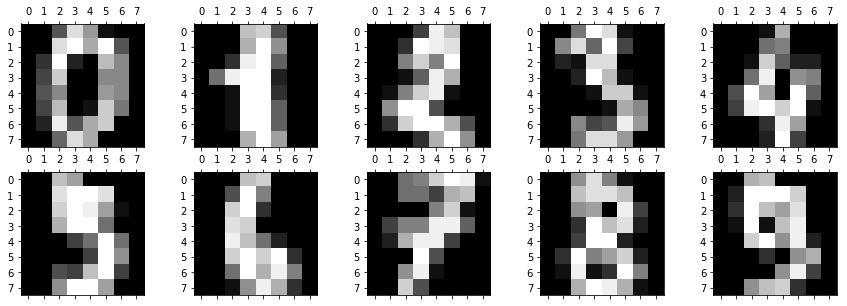

In [8]:
# Visualize some digits from the data set.
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(15,5))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range (len(ax)):
    plt.gray()
    ax[i].matshow(digits.images[i])

In [9]:
# Labels for the written digits displayed above.
digits.target[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In the next step, count the data examples.

In [10]:
# Calculate the number of samples.
samples_count = len(digits.images)

print('Number of samples: ' + str(samples_count))

Number of samples: 1797


<a id='model'></a>
## 3. Create a scikit-learn model

In this section you learn how to:
- [3.1 Split data](#prep)
- [3.2 Create a scikit-learn machine learning pipeline](#pipe)
- [3.3 Train a model](#train)

### 3.1 Split data<a id='prep'></a>

In this subsection you will split your data into: 
- Train data set
- Test data set
- Score data sets

In [11]:
# Split the data into data sets and display the number of records for each data set.
train_data = digits.data[: int(0.7*samples_count)]
train_labels = digits.target[: int(0.7*samples_count)]

test_data = digits.data[int(0.7*samples_count): int(0.9*samples_count)]
test_labels = digits.target[int(0.7*samples_count): int(0.9*samples_count)]

score_data = digits.data[int(0.9*samples_count): ]

print('Number of training records: ' + str(len(train_data)))
print('Number of testing records : ' + str(len(test_data)))
print('Number of scoring records : ' + str(len(score_data)))

Number of training records: 1257
Number of testing records : 360
Number of scoring records : 180


Your data has been successfully split into three data sets: 

-  The train data set, which is the largest group, is used for training.
-  The test data set is used for model evaluation and to test the assumptions of the model.
-  The score data set is used for scoring.

### 3.2 Create a scikit-learn machine learning pipeline<a id='pipe'></a>

In this section, you will create a scikit-learn machine learning pipeline and then train the model.

First, import the scikit-learn machine learning modules that are needed in the subsequent steps.

In [12]:
# Import scikit-learn packages.
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import svm, metrics

Standardize the features by removing the mean and scaling to unit variance.

In [13]:
scaler = preprocessing.StandardScaler()

Next, define the estimators you want to use for classification. The following example uses Support Vector Machines (SVM) with the radial basis function (used for non-linear data) as the kernel.

In [14]:
clf = svm.SVC(kernel='rbf', gamma='auto')

Build the pipeline. A pipeline consists of transformer and an estimator.

In [15]:
pipeline = Pipeline([('scaler', scaler), ('svc', clf)])

### 3.3 Train a model<a id='train'></a>

Now, you can use the **pipeline** and **train data** you defined previously to train your SVM model.

In [16]:
model = pipeline.fit(train_data, train_labels)

Use **test data** to generate an evaluation report to check your **model quality**.

In [17]:
# Evaluate your model.
predicted = model.predict(test_data)

print('Evaluation report: \n\n%s' % metrics.classification_report(test_labels, predicted))

Evaluation report: 

             precision    recall  f1-score   support

          0       1.00      0.97      0.99        37
          1       0.97      0.97      0.97        34
          2       1.00      0.97      0.99        36
          3       1.00      0.94      0.97        35
          4       0.78      0.97      0.87        37
          5       0.97      0.97      0.97        38
          6       0.97      0.86      0.91        36
          7       0.92      0.97      0.94        35
          8       0.91      0.89      0.90        35
          9       0.97      0.92      0.94        37

avg / total       0.95      0.94      0.95       360



<div class="alert-block alert-info"><br>You can tune your model, or try to create classification models to achieve better accuracy. For the simplicity purpose of this example, the tuning and model selections are omitted.<br><br></div>

<a id='persistence'></a>
## 4. Save, load, and delete a model in the WML repository

In this section, you will learn how to use the `watson-machine-learning-client` package to manage your model in the WML repository.

- [4.1 Set up the WML instance](#work)
- [4.2 Save the model in the WML repository](#save)
- [4.3 Load a model from the WML repository](#load_model)
- [4.4 Delete a model from the WML repository](#delete)

<div class="alert-block alert-info"><br> You can find more information about the watson-machine-learning-client <a href="https://wml-api-pyclient-dev-v4.mybluemix.net/" target="_blank" rel="noopener noreferrer">here</a>.<br><br></div>

### 4.1 Authenticate<a id='work'></a>

First, import the required modules.

In [18]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

**Authenticate the Python client on Watson Studio Local.**<br><br>

<div class="alert-block alert-info"><br>
To find your authentication information (your credentials) follow the steps provided here in the <a href="https://www.ibm.com/support/knowledgecenter/SSHGWL_2.0.0/wsj/analyze-data/ml-notebook_local.html" target="_blank" rel="noopener no referrer">Documentation</a>.<br><br></div>

**Action**: Enter your credentials in the following cell.

In [19]:
wml_credentials={
  'url': '***',
  'username': '***',
  'password': '***',
  'instance_id': 'icp'
}

#### Instantiate the WML API client object. 

In [21]:
client = WatsonMachineLearningAPIClient(wml_credentials)

You can see the stored predefined runtimes here.

In [22]:
# Predefined runtimes.
client.runtimes.list(pre_defined=True)

--------------------------  --------------------------  ------------------------  --------
GUID                        NAME                        CREATED                   PLATFORM
do_12.9                     do_12.9                     2019-07-27T02:43:25.906Z  do
pmml_4.3                    pmml_4.3                    2019-07-27T02:43:23.635Z  pmml
pmml_4.2.1                  pmml_4.2.1                  2019-07-27T02:43:21.348Z  pmml
pmml_4.2                    pmml_4.2                    2019-07-27T02:43:19.100Z  pmml
pmml_4.1                    pmml_4.1                    2019-07-27T02:43:16.783Z  pmml
pmml_4.0                    pmml_4.0                    2019-07-27T02:43:14.656Z  pmml
pmml_3.2                    pmml_3.2                    2019-07-27T02:43:12.517Z  pmml
pmml_3.1                    pmml_3.1                    2019-07-27T02:43:10.155Z  pmml
pmml_3.0                    pmml_3.0                    2019-07-27T02:43:07.970Z  pmml
ai-function_0.1-py3         ai-functi

### 4.2 Save the model in the WML repository<a id='save'></a>

Create the model metadata to store in the WML repository. You can obtain the space UID (one of the MetaNames in the model metadata) by using the following cells.<br><br>

<div class="alert-block alert-info"><br>
You can create your own <a href="https://www.ibm.com/support/knowledgecenter/SSHGWL_2.0.0/wsj/analyze-data/ml-spaces_local.html" target="_blank" rel="noopener no referrer">deployment space</a> by selecting <b>Deployment Spaces</b> from the Navigation Menu on the top left of this page.<br><br></div>

In [23]:
# Obtain the UId of your space
def guid_from_space_name(client, space_name):
    instance_details = client.service_instance.get_details()
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['guid'])

**Action:** Enter the name of your deployment space in the code below: `space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE')`.

In [24]:
# Enter the name of your deployment space here:
space_uid = guid_from_space_name(client, 'YOUR DEPLOYMENT SPACE')
print("Space UID = " + space_uid)

Space UID = 1c428722-4621-4ed3-9f77-7082c338ac35


In [25]:
# Model Metadata.
meta_props={
    client.repository.ModelMetaNames.NAME: "Digits prediction model",
    client.repository.ModelMetaNames.RUNTIME_UID: "scikit-learn_0.19-py3",
    client.repository.ModelMetaNames.TYPE: "scikit-learn_0.19",
    client.repository.ModelMetaNames.SPACE_UID: space_uid
}

You need the model UID to create the deployment. You can extract the model UID from the saved model details and use it in the next section to create the deployment.

In [26]:
# Create the model artifact.
model_artifact = client.repository.store_model(model,
                                                   meta_props=meta_props,
                                                   training_data=train_data,
                                                   training_target=train_labels)
model_uid = client.repository.get_model_uid(model_artifact)
print("Model UID = " + model_uid)

Model UID = 7256df3d-cba6-4da9-b6dd-66ee67fae385


#### Get information about a specific model in the WML repository

Get the saved model metadata from WML.

In [27]:
# Details about the model.
model_details = client.repository.get_details(model_uid)
from pprint import pprint
pprint(model_details)

{'entity': {'content_status': {'state': 'persisted'},
            'label_column': 'l1',
            'name': 'Digits prediction model',
            'runtime': {'href': '/v4/runtimes/scikit-learn_0.19-py3'},
            'space': {'href': '/v4/spaces/1c428722-4621-4ed3-9f77-7082c338ac35'},
            'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
                                                         'endpoint_url': 'not_applicable',
                                                         'secret_access_key': 'not_applicable'},
                                          'location': {'bucket': 'not_applicable'},
                                          'schema': {'fields': [{'name': 'f0',
                                                                 'type': 'float'},
                                                                {'name': 'f1',
                                                                 'type': 'float'},
                        

#### Get the information of all the models in the WML repository

In [28]:
# Display a list of all the models.
models_details = client.repository.list_models()

------------------------------------  -----------------------  ------------------------  -----------------
GUID                                  NAME                     CREATED                   TYPE
7256df3d-cba6-4da9-b6dd-66ee67fae385  Digits prediction model  2019-09-25T21:20:48.364Z  scikit-learn_0.19
------------------------------------  -----------------------  ------------------------  -----------------


### 4.3 Load a model from the WML repository<a id='load_model'></a>

In this subsection, you will learn how to load a saved model from the WML repository.

In [29]:
loaded_model = client.repository.load(model_uid)

Make test predictions to check that the model has been loaded correctly.

In [30]:
test_predictions = loaded_model.predict(test_data[:10])

In [31]:
# The predictions made by the model.
print(test_predictions)

[4 0 5 3 6 9 6 4 7 5]


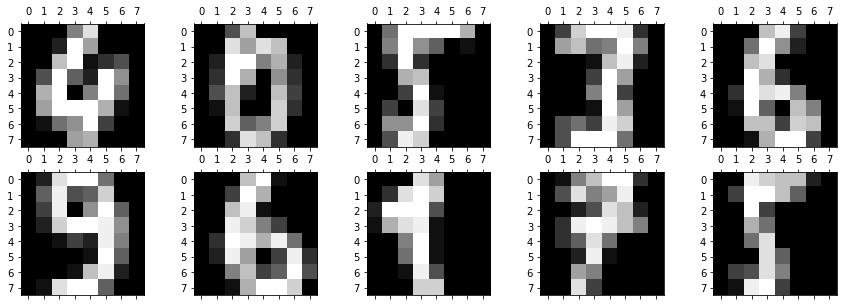

In [32]:
# Visualize the test set images used for the prediction.
f, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(15,5))
ax = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range (len(ax)):
    plt.gray()
    ax[i].matshow(test_data[i].reshape((8, 8)))

In [33]:
# The correct labels for the digits above.
test_labels[:10]

array([4, 0, 5, 3, 6, 9, 6, 1, 7, 5])

As you can see, you are able to make predictions which means that the model has loaded correctly. You have now learned how save and load the model in/from the WML repository.

### 4.4 Delete a model from the WML repository<a id='delete'></a>

The code in the following cell deletes a published model from the WML repository. The code is not executable at this stage because you still need the model for deployment.

<a id='scoring'></a>
## 5. Deploy and score data in the WML repository

In this section, you will learn how to use the WML API client to perform online scoring and score a test data record.

- [5.1 Create an online deployment for the published model](#create)
- [5.2 Get deployments](#getdeploy)
- [5.3 Score data](#score)
- [5.4 Delete the deployment](#deldeploy)
- [5.5 Delete the model](#delmodel)


### 5.1 Create an online deployment for the published model<a id='create'></a>

Now, you can create a deployment, *Deployment of scikit handwritten digits model*.

In [34]:
# Deployment metadata.
deploy_meta = {
    client.deployments.ConfigurationMetaNames.NAME: "Deployment of scikit handwritten digits model",
    client.deployments.ConfigurationMetaNames.ONLINE: {}
}

In [35]:
# Create the deployment.
deploy_details = client.deployments.create(model_uid, meta_props=deploy_meta)



#######################################################################################

Synchronous deployment creation for uid: '7256df3d-cba6-4da9-b6dd-66ee67fae385' started

#######################################################################################


initializing


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='46b140c2-7c36-434c-9276-d8d559745503'
------------------------------------------------------------------------------------------------




The model has been successfully deployed.<br><br>

### 5.2 Get deployments<a id='getdeploy'></a>

You can get the `deployment_uid` by parsing the deployment details for the last deployed model.

In [36]:
# Deployment UID.
deployment_uid = client.deployments.get_uid(deploy_details)
print('Deployment uid = {}'.format(deployment_uid))

Deployment uid = 46b140c2-7c36-434c-9276-d8d559745503


### 5.3 Score data<a id='score'></a>

Use the following method to run a test scoring request against the deployed model.

**Action**: Prepare scoring payload with the records to score.

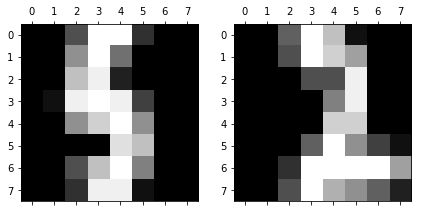

In [37]:
# Prepare scoring payload.
job_payload = {
    client.deployments.ScoringMetaNames.INPUT_DATA: [{
        'values': [list(score_data[0]), list(score_data[1])]
    }]
}

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(7,4))
ax = [ax1, ax2]

for i in range (len(ax)):
    plt.gray()
    ax[i].matshow(np.array(job_payload['scoring_input_data'][0]['values'][i]).reshape((8, 8)))

Use the ``client.deployments.score()`` method to run the scoring.

In [38]:
# Perform prediction and display the result.
job_details = client.deployments.score(deployment_uid,job_payload)
pprint(job_details)

{'predictions': [{'fields': ['prediction'], 'values': [[5], [2]]}]}


The model had predicted the numbers `5` and `2` respectively.

In [39]:
digits.target[int(0.9*samples_count):int(0.9*samples_count)+2]

array([5, 2])

As you can see the model has succesfully predicted the values.

### 5.4 Delete the deployment<a id='deldeploy'></a>

Use the following method to delete the deployment.

In [40]:
# Delete deployment.
client.deployments.delete(deployment_uid)

'SUCCESS'

You can check if your deployment has deleted successfully by generating a list of your saved deployments:

In [41]:
# List the deployments.
client.deployments.list()

----  ----  -----  -------  -------------
GUID  NAME  STATE  CREATED  ARTIFACT_TYPE
----  ----  -----  -------  -------------


### 5.5 Delete the model<a id='delmodel'></a>

In [42]:
# Delete model.
client.repository.delete(model_uid)

'SUCCESS'

You can check if your model has deleted successfully by generating a list of your saved models:

In [43]:
# List the models.
client.repository.list_models()

----  ----  -------  ----
GUID  NAME  CREATED  TYPE
----  ----  -------  ----


<a id='summary'></a>
## 6. Summary and next steps     

You successfully completed this notebook! 
 
You learned how to use the scikit-learn machine learning as well as the Watson Machine Learning (WML) API client for model creation and deployment. 

### Resources <a id="resources"></a>

To learn more about configurations used in this notebook or more sample notebooks, tutorials, documentation, how-tos, and blog posts, check out these links:

<div class="alert alert-block alert-success">

<h4>IBM documentation</h4>
<br>
 <li> <a href="https://wml-api-pyclient-dev-v4.mybluemix.net" target="_blank" rel="noopener no referrer">watson-machine-learning</a></li> 
 <li> <a href="https://www.ibm.com/support/knowledgecenter/SSHGWL_2.0.0/local/welcome.html" target="_blank" rel="noopener noreferrer">Watson Studio</a></li>
 
<h4> IBM Samples</h4>
<br>
 <li> <a href="https://github.com/IBMDataScience/sample-notebooks" target="_blank" rel="noopener noreferrer">Sample notebooks</a></li>
 
<h4> Others</h4>
<br>
 <li> <a href="https://www.python.org" target="_blank" rel="noopener noreferrer">Official Python website</a></li>
 <li> <a href="https://matplotlib.org" target="_blank" rel="noopener noreferrer">Matplotlib: Python plotting</a></li>
 <li> <a href="https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html" target="_blank" rel="noopener noreferrer">scikit-learn: Grid Search</a></li>
 </div>

### Authors

**Wojciech Sobala** is a Data Scientist at IBM developing enterprise-level applications that substantially increases clients' ability to turn data into actionable knowledge.  
**Ananya Kaushik** is a Data Scientist at IBM.

Copyright © 2017-2019 IBM. This notebook and its source code are released under the terms of the MIT License.

<div style='background:#F5F7FA; height:110px; padding: 2em; font-size:14px;'>
<span style='font-size:18px;color:#152935;'>Love this notebook? </span>
<span style='font-size:15px;color:#152935;float:right;margin-right:40px;'>Don't have an account yet?</span><br>
<span style='color:#5A6872;'>Share it with your colleagues and help them discover the power of Watson Studio!</span>
<span style='border: 1px solid #3d70b2;padding:8px;float:right;margin-right:40px; color:#3d70b2;'><a href='https://ibm.co/wsnotebooks' target='_blank' style='color: #3d70b2;text-decoration: none;'>Sign Up</a></span><br>
</div>